In [5]:
import sys
# assert Python 3.7 or later is required
assert sys.version_info >= (3, 7)

import cv2 as cv
import numpy as np
import imutils
import math
import matplotlib.pyplot as plt

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()


True

# Q1

Image rotated and saved successfully!


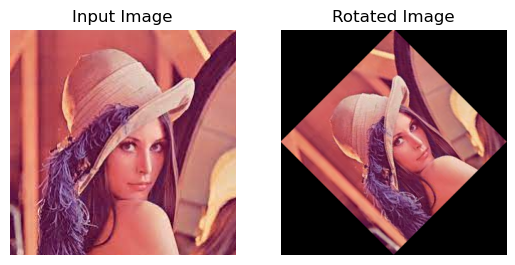

In [6]:
def rotate_image(image_path, angle):
    # Load the image from the specified path
    image = cv2.imread(image_path)

    # Get the center of the image
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)

    # Define the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Determine the new image dimensions to avoid cropping
    new_width = int(w * abs(rotation_matrix[0, 0]) + h * abs(rotation_matrix[0, 1]))
    new_height = int(w * abs(rotation_matrix[1, 0]) + h * abs(rotation_matrix[1, 1]))

    # Adjust the rotation matrix to prevent cropping
    rotation_matrix[0, 2] += (new_width - w) // 2
    rotation_matrix[1, 2] += (new_height - h) // 2

    # Perform the rotation without cropping
    rotated_image = cv2.warpAffine(image, rotation_matrix, (new_width, new_height))

    return rotated_image

if __name__ == "__main__":
    input_image_path = "lena.jfif"
    output_image_path = "lena_rotated.jpg"
    rotation_angle = 45

    # Rotate the image
    rotated_image = rotate_image(input_image_path, rotation_angle)

    # Save the rotated image
    cv2.imwrite(output_image_path, rotated_image)
    print("Image rotated and saved successfully!")

    # Display the input and rotated images
    input_image = cv2.cvtColor(cv2.imread(input_image_path), cv2.COLOR_BGR2RGB)
    rotated_image = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)

    plt.subplot(1, 2, 1)
    plt.imshow(input_image)
    plt.title("Input Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(rotated_image)
    plt.title("Rotated Image")
    plt.axis('off')

    plt.show()


# Q2

Images overlaid and saved successfully!


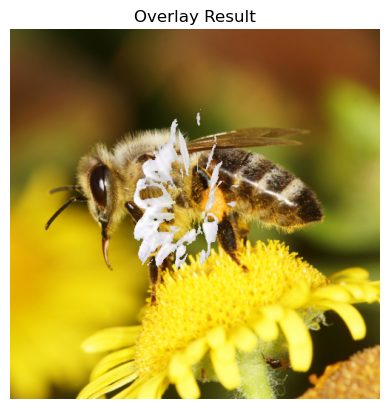

In [7]:
def overlay_images(background_path, overlay_path, output_path):
    # Load the background and overlay images
    background = cv2.imread(background_path)
    overlay = cv2.imread(overlay_path)

    # Resize the overlay image to fit the background
    overlay = cv2.resize(overlay, (background.shape[1], background.shape[0]))

    # Convert the overlay image to grayscale
    overlay_gray = cv2.cvtColor(overlay, cv2.COLOR_BGR2GRAY)

    # Threshold the grayscale overlay image to create a binary mask
    _, mask = cv2.threshold(overlay_gray, 200, 255, cv2.THRESH_BINARY)

    # Invert the binary mask
    mask_inv = cv2.bitwise_not(mask)

    # Extract the region of interest (ROI) from the background image
    background_roi = cv2.bitwise_and(background, background, mask=mask_inv)

    # Extract the ROI from the overlay image
    overlay_roi = cv2.bitwise_and(overlay, overlay, mask=mask)

    # Add the two ROIs to get the final result
    output = cv2.add(background_roi, overlay_roi)

    # Save the output image
    cv2.imwrite(output_path, output)
    print("Images overlaid and saved successfully!")

if __name__ == "__main__":
    background_image_path = "native-bee.png"
    overlay_image_path = "flower.jfif"
    output_image_path = "overlay_result.png"

    overlay_images(background_image_path, overlay_image_path, output_image_path)

    # Display the output image
    output_image = cv2.cvtColor(cv2.imread(output_image_path), cv2.COLOR_BGR2RGB)
    plt.imshow(output_image)
    plt.title("Overlay Result")
    plt.axis('off')
    plt.show()



# Q3


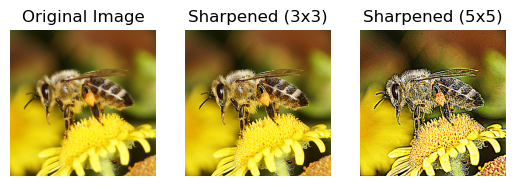

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_custom_kernel(image_path, kernel_size):
    # Load the image
    image = cv2.imread(image_path)

    # Define the custom kernels
    if kernel_size == 3:
        kernel = np.array([[-1, 0, -1], [0, 5, 0], [-1, 0, -1]])
    elif kernel_size == 5:
        kernel = np.array([[-1, -1, -1, -1, -1],
                           [-1, -1, -1, -1, -1],
                           [-1, -1, 25, -1, -1],
                           [-1, -1, -1, -1, -1],
                           [-1, -1, -1, -1, -1]])

    # Apply the custom kernel using convolution
    sharpened_image = cv2.filter2D(image, -1, kernel)

    return sharpened_image

if __name__ == "__main__":
    input_image_path = "native-bee.png"

    # Apply the 3x3 custom kernel
    sharpened_image_3x3 = apply_custom_kernel(input_image_path, kernel_size=3)

    # Apply the 5x5 custom kernel
    sharpened_image_5x5 = apply_custom_kernel(input_image_path, kernel_size=5)

    # Display the original and sharpened images
    original_image = cv2.cvtColor(cv2.imread(input_image_path), cv2.COLOR_BGR2RGB)
    sharpened_image_3x3 = cv2.cvtColor(sharpened_image_3x3, cv2.COLOR_BGR2RGB)
    sharpened_image_5x5 = cv2.cvtColor(sharpened_image_5x5, cv2.COLOR_BGR2RGB)

    plt.subplot(1, 3, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(sharpened_image_3x3)
    plt.title("Sharpened (3x3)")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(sharpened_image_5x5)
    plt.title("Sharpened (5x5)")
    plt.axis('off')

    plt.show()


# Q4

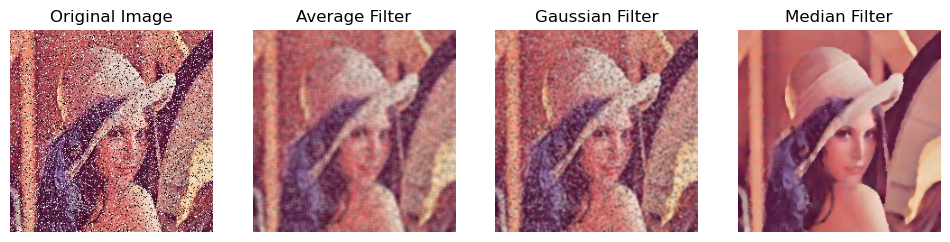

In [10]:
def apply_average_filter(image_path, kernel_size):
    image = cv2.imread(image_path)
    smoothed_image = cv2.blur(image, (kernel_size, kernel_size))
    return smoothed_image

def apply_gaussian_filter(image_path, kernel_size, sigmaX=0):
    image = cv2.imread(image_path)
    smoothed_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigmaX)
    return smoothed_image

def apply_median_filter(image_path, kernel_size):
    image = cv2.imread(image_path)
    smoothed_image = cv2.medianBlur(image, kernel_size)
    return smoothed_image

if __name__ == "__main__":
    input_image_path = "noise_lena.jpg"
    kernel_size = 5

    # Apply average filter
    smoothed_average = apply_average_filter(input_image_path, kernel_size)

    # Apply Gaussian filter
    smoothed_gaussian = apply_gaussian_filter(input_image_path, kernel_size)

    # Apply median filter
    smoothed_median = apply_median_filter(input_image_path, kernel_size)

    # Display the original and smoothed images
    original_image = cv2.cvtColor(cv2.imread(input_image_path), cv2.COLOR_BGR2RGB)
    smoothed_average = cv2.cvtColor(smoothed_average, cv2.COLOR_BGR2RGB)
    smoothed_gaussian = cv2.cvtColor(smoothed_gaussian, cv2.COLOR_BGR2RGB)
    smoothed_median = cv2.cvtColor(smoothed_median, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 4, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(smoothed_average)
    plt.title("Average Filter")
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(smoothed_gaussian)
    plt.title("Gaussian Filter")
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(smoothed_median)
    plt.title("Median Filter")
    plt.axis('off')

    plt.show()
